In [3]:
import tensorflow as tf

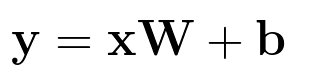

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, you'll need a Tensor that can be modified. <br><br>
This leaves out tf.placeholder() and tf.constant(), since those Tensors can't be modified. 
<br><br>This is where tf.Variable class comes in.

In [4]:
x=tf.Variable(5)

In [5]:
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [6]:
tf.random.truncated_normal?

In [7]:
n_features = 120
n_labels=5
weights = tf.Variable(tf.random.truncated_normal((n_features, n_labels)))

In [10]:
weights.value

<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(120, 5) dtype=float32, numpy=
array([[ 9.86285150e-01,  8.60561192e-01, -9.57266569e-01,
        -1.38197219e+00,  1.09747255e+00],
       [-4.13590342e-01, -3.36140059e-02,  2.05339655e-01,
         9.27337334e-02, -1.21661019e+00],
       [ 1.11784673e+00,  6.18188560e-01,  3.28054488e-01,
         6.03612542e-01, -9.79663253e-01],
       [-9.59100068e-01, -5.22192299e-01,  1.80626428e+00,
        -1.58779919e+00, -2.55096108e-01],
       [ 1.77804029e+00, -1.53554952e+00,  1.11100543e+00,
         1.19831264e+00, -6.52435899e-01],
       [ 5.04524112e-01, -9.95511591e-01, -1.28542817e+00,
         1.97136378e+00, -1.07448304e+00],
       [-1.77141070e-01, -4.53953356e-01, -8.59808981e-01,
         1.73005946e-02,  6.86106458e-02],
       [-2.01755837e-01, -1.71071434e+00, -1.27198017e+00,
         1.16673756e+00,  4.82131779e-01],
       [ 5.31812966e-01,  8.53288770e-01,  1.35793316e+00,
        -2.3721793

In [11]:
bias = tf.Variable(tf.zeros(n_labels))

In [12]:
bias

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

You'll be classifying the handwritten numbers 0, 1, and 2 from the MNIST dataset using TensorFlow. The above is a small sample of the data you'll be training on. Notice how some of the 1s are written with a serif at the top and at different angles. The similarities and differences will play a part in shaping the weights of the model.

In [13]:
def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.random.truncated_normal(([n_features, n_labels])))


In [15]:
def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))



In [16]:

def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(x, w), b)

In [21]:
import tensorflow_datasets as tfds
dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /home/wajeeh-machine/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [22]:
def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


In [26]:
# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:MatMul] name: MatMul/

In [ ]:


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output